**Import Libraries**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as pyplot
sns.set(style='white',color_codes=True)

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/SeoulBikeData.csv")

In [3]:
df.head()


,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


**Step 1: Exploratry Data Analysis and Preprocessing**

In [4]:
print(" This DataFrame Contains {} lines and {} columns ".format(df.shape[0],df.shape[1]))

 This DataFrame Contains 8760 lines and 14 columns 


Features Datatypes

In [5]:
df.dtypes

Date                         object
Rented Bike Count             int64
Hour                          int64
Temperature(C)              float64
Humidity(%)                   int64
Wind speed (m/s)            float64
Visibility (10m)              int64
Dew point temperature(C)    float64
Solar Radiation (MJ/m2)     float64
Rainfall(mm)                float64
Snowfall (cm)               float64
Seasons                      object
Holiday                      object
Functioning Day              object
dtype: object

**Here is statistical description of the features**

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


**Verify that there are no missing Values**

In [7]:
df.isna().sum()


Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

**We Convert as Datetime the series 'Date'**

In [8]:
from datetime import datetime
df.Date=pd.to_datetime(df.Date)
df.info()
df['Month']=pd.DatetimeIndex(df['Date']).month
df['Year']=pd.DatetimeIndex(df['Date']).year
df['tday']=pd.DatetimeIndex(df['Date']).day
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(C)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year,tday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30


Outliers

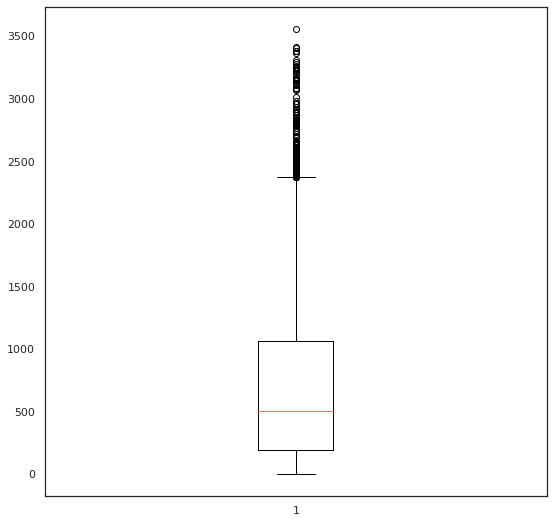

In [9]:
plt.figure(figsize=(9,9))
plt.boxplot(df['Rented Bike Count'])
plt.show()

In [10]:
df_cat=df.select_dtypes(include='object')

In [11]:
df_cat.head()

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes


Dummies for Categorical Variables

In [12]:
bike_data=df
for col in df_cat:
  dummies=pd.get_dummies(df[col],drop_first=True)
  bike_data=pd.concat([bike_data,dummies],axis=1)

In [13]:
bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year,tday,Spring,Summer,Winter,No Holiday,Yes
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1


# Outlier Analysis


FOR THE COLUMNS HAVING OUTLIERS, WE WILL REMOVE THEM AND CONSIDER ONLY THOSE VALUES WHICH LIE BETWEEN 25TH PERCENTILE AND 75 PERCENTILE

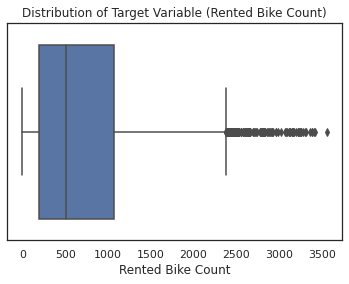

In [14]:
sns.boxplot(bike_data['Rented Bike Count'])
plt.title('Distribution of Target Variable (Rented Bike Count)')
plt.show()


In [15]:
Q1 = np.percentile(bike_data['Rented Bike Count'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(bike_data['Rented Bike Count'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(bike_data['Rented Bike Count'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

low limit: -1120.75
upper limit: 2377.25


In [16]:
bike_data.rename(columns = {'Rented Bike Count':'RBC'}, inplace = True)

In [17]:
Bikes_df2 = bike_data[bike_data.RBC< up_lim]
Bikes_df2=Bikes_df2[Bikes_df2.RBC> low_lim]

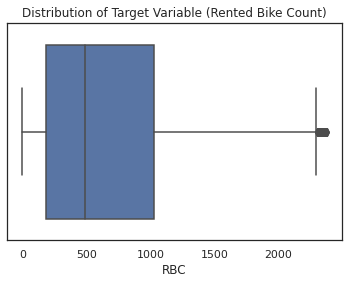

In [18]:
sns.boxplot(Bikes_df2['RBC'])
plt.title('Distribution of Target Variable (Rented Bike Count)')
plt.show()

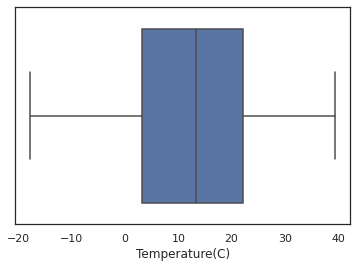

In [19]:
sns.boxplot(Bikes_df2['Temperature(C)'])

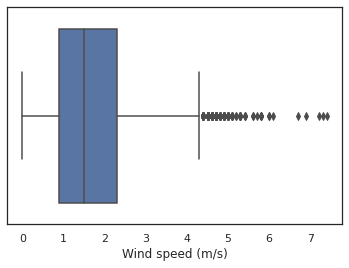

In [20]:
sns.boxplot(Bikes_df2['Wind speed (m/s)'])

In [21]:
Bikes_df2.rename(columns = {'Wind speed (m/s)':'WS'}, inplace = True)

In [22]:
Q1 = np.percentile(Bikes_df2['WS'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(Bikes_df2['WS'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(Bikes_df2['WS'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

low limit: -1.1999999999999997
upper limit: 4.3999999999999995


In [23]:
Bikes_df2=Bikes_df2[Bikes_df2.WS<up_lim]
Bikes_df2=Bikes_df2[Bikes_df2.WS>low_lim]

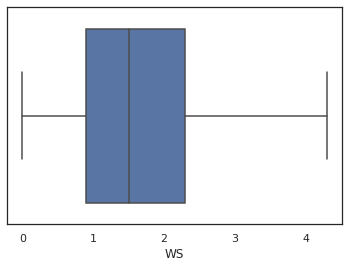

In [24]:
sns.boxplot(Bikes_df2.WS)

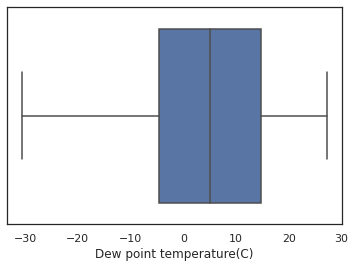

In [25]:
sns.boxplot(Bikes_df2['Dew point temperature(C)'])

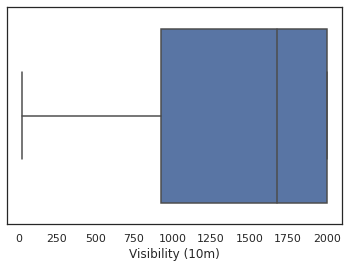

In [26]:
sns.boxplot(Bikes_df2['Visibility (10m)'])

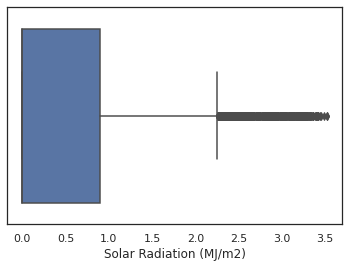

In [27]:
sns.boxplot(Bikes_df2['Solar Radiation (MJ/m2)'])

In [28]:
Bikes_df2.rename(columns = {'Solar Radiation (MJ/m2)':'SR'}, inplace = True)

In [29]:
Q1 = np.percentile(Bikes_df2['SR'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(Bikes_df2['SR'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(Bikes_df2['SR'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

low limit: -1.35
upper limit: 2.25


In [30]:
Bikes_df2 = Bikes_df2[Bikes_df2.SR< up_lim]
Bikes_df2 = Bikes_df2[Bikes_df2.SR>low_lim]

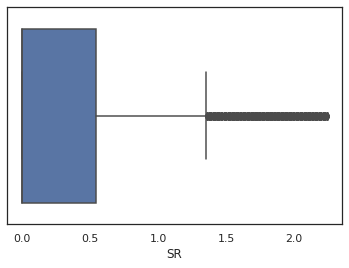

In [31]:
sns.boxplot(Bikes_df2.SR)

In [32]:
Bikes_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7752 entries, 0 to 8759
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      7752 non-null   datetime64[ns]
 1   RBC                       7752 non-null   int64         
 2   Hour                      7752 non-null   int64         
 3   Temperature(C)            7752 non-null   float64       
 4   Humidity(%)               7752 non-null   int64         
 5   WS                        7752 non-null   float64       
 6   Visibility (10m)          7752 non-null   int64         
 7   Dew point temperature(C)  7752 non-null   float64       
 8   SR                        7752 non-null   float64       
 9   Rainfall(mm)              7752 non-null   float64       
 10  Snowfall (cm)             7752 non-null   float64       
 11  Seasons                   7752 non-null   object        
 12  Holiday             

**Here are the correlations between Variables**

In [33]:
data_corr=Bikes_df2.corr()
data_corr=data_corr['RBC'][1:]
data_corr[abs(data_corr)>=0.0].sort_values(ascending=False)

Temperature(C)              0.533168
Hour                        0.400517
Dew point temperature(C)    0.381486
Summer                      0.300130
SR                          0.248899
Year                        0.210914
Yes                         0.203973
Visibility (10m)            0.188051
WS                          0.106349
Month                       0.085771
No Holiday                  0.070541
tday                        0.047612
Spring                      0.013486
Rainfall(mm)               -0.125173
Snowfall (cm)              -0.140926
Humidity(%)                -0.162957
Winter                     -0.420918
Name: RBC, dtype: float64

In [34]:
bike_cat2=Bikes_df2

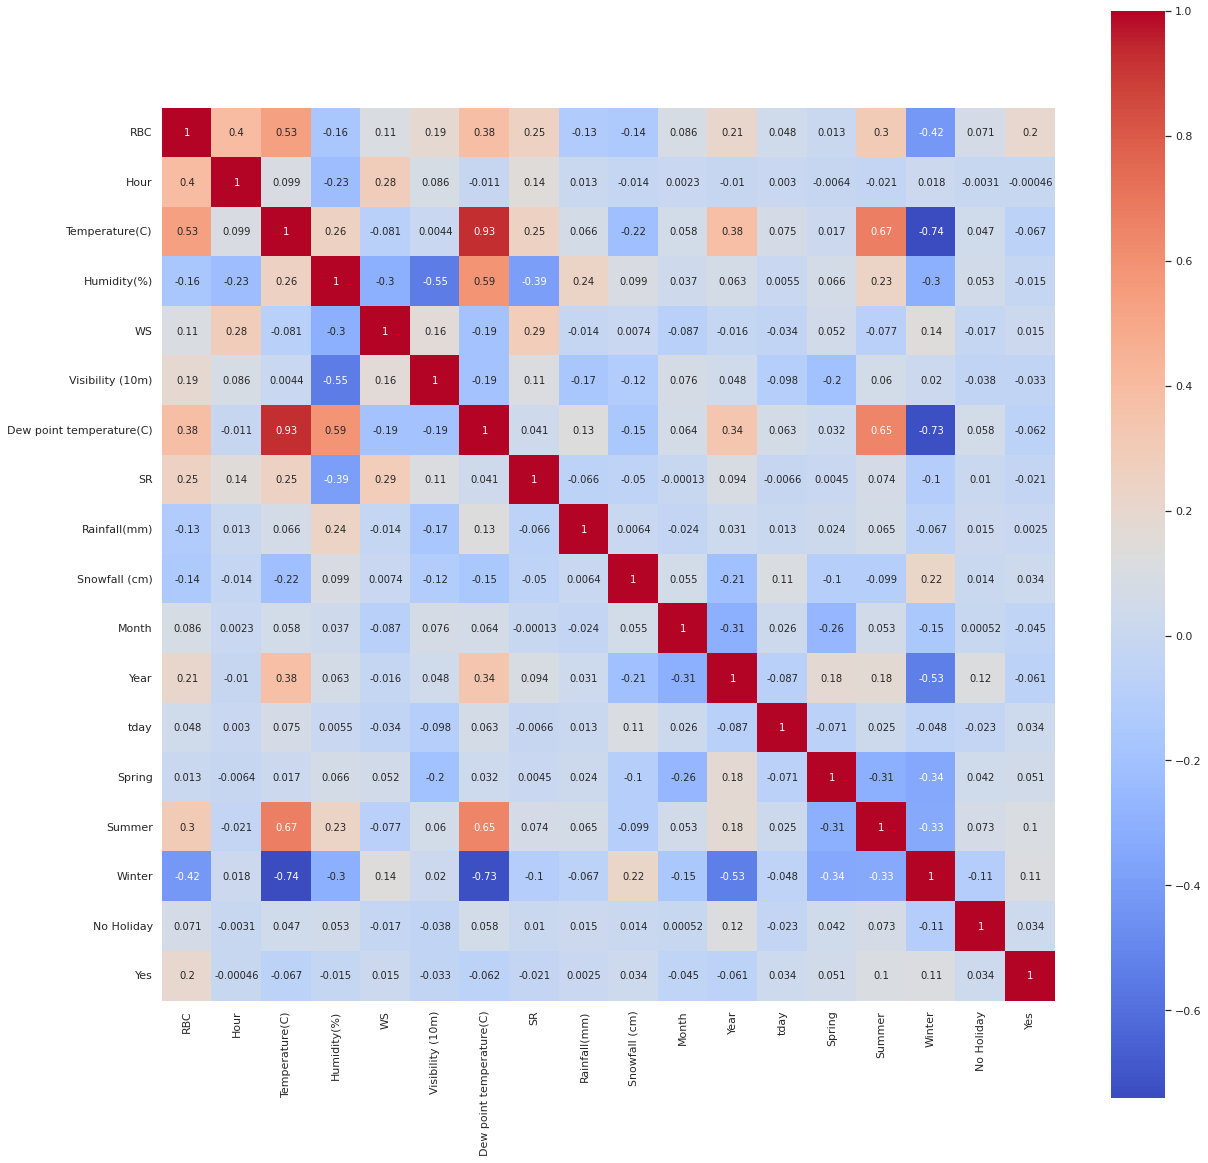

In [35]:
plt.figure(figsize=(20,20))
corr=bike_cat2.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',square=True)
plt.show()

In [36]:
print(bike_cat2.columns.values)

['Date' 'RBC' 'Hour' 'Temperature(C)' 'Humidity(%)' 'WS'
 'Visibility (10m)' 'Dew point temperature(C)' 'SR' 'Rainfall(mm)'
 'Snowfall (cm)' 'Seasons' 'Holiday' 'Functioning Day' 'Month' 'Year'
 'tday' 'Spring' 'Summer' 'Winter' 'No Holiday' 'Yes']


In [37]:
Bikes_categorical2=bike_cat2.drop(['Date','Seasons','Holiday','Functioning Day','Rainfall(mm)'],axis=1)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(Bikes_categorical2)

StandardScaler(copy=True, with_mean=True, with_std=True)

*** Step 3 Modeling ***

In [39]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.linear_model import Lasso



In [40]:
train, val = train_test_split(Bikes_categorical2, test_size=0.3)

In [41]:
trainx=train.drop(['RBC'],axis=1)
trainy=train['RBC']

val_x=val.drop(['RBC'],axis=1)
val_y=val['RBC']

In [42]:
print(trainy.shape)
print(trainx.shape)
print(val_y.shape)
print(val_x.shape)
test=df[6570:]

(5426,)
(5426, 16)
(2326,)
(2326, 16)


In [43]:
lr=LinearRegression()
lr.fit(trainx,trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
df_pred=lr.predict(val_x)

In [45]:
print("The model's metrics values are: ")
print("Accuracy: ", lr.score(val_x,val_y))
print("Mean Absolute Error: ",mean_absolute_error(df_pred , val_y))
print("Mean Squared Error: " ,mean_squared_error(df_pred,val_y))
print("R-squared score: ", r2_score(val_y,df_pred))

The model's metrics values are: 
Accuracy:  0.5501918153542956
Mean Absolute Error:  308.5573402882329
Mean Squared Error:  163291.82552771768
R-squared score:  0.5501918153542956


In [46]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge
ridge.fit(trainx,trainy)
rp=ridge.predict(val_x)
ridge_score = ridge.score(val_x,val_y)

ridge.coef_
print("Ridge:")
print("R-square score:", r2_score(rp,val_y))
print("Training score",ridge_score)

Ridge:
R-square score: 0.16722404020686588
Training score 0.550124896787827


In [47]:
from sklearn.linear_model import Lasso 
lasso = Lasso()
lasso
lasso.fit(trainx,trainy)
lp=lasso.predict(val_x)
lasso_score = lasso.score(val_x,val_y)
lasso.coef_
print("Lasso:")
print("R-squared score:",r2_score(lp,val_y))
print("Training score",lasso_score)


Lasso:
R-squared score: 0.1505039671611238
Training score 0.5495273756652834
